## Boston House Price Prediction 

### In this project we are going to do perdict the house price based on some of the feature.
#using Linear and KNN algorithm!!!

### Import the Libraires and Dataset

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot

import seaborn
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from matplotlib import pyplot as plt

In [2]:
# Import the train dataset 
df = pd.read_csv("train.csv")
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


### Data Preprocessing

In [3]:
# Shape of dataset
print("Shape of Trainnig dataset:", df.shape)

Shape of Trainnig dataset: (333, 15)


In [4]:
# Checking null values for training dataset
df.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [5]:
# Here lets change 'medv' column name to 'Price'
df.rename(columns={'medv':'Price'},inplace=True)

In [6]:
# Information about the training dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  Price    333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [7]:
# Describe
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Price
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


### Exploratory Data Analysis

In [8]:
# Let's know more about the data features

* **CRIM** per capita crime rate by town
* **ZN** proportion of residential land zoned for lots over 25,000 sq.ft.
* **INDUS** proportion of non-retail business acres per town
* **CHAS** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* **NOX** nitric oxides concentration (parts per 10 million)
* **RM** average number of rooms per dwelling
* **AGE** proportion of owner-occupied units built prior to 1940
* **DIS** weighted distances to five Boston employment centres
* **RAD** index of accessibility to radial highways
* **TAX** full-value property-tax rate per 10,000usd
* **PTRATIO** pupil-teacher ratio by town
* **Black** 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* **LSTAT** % lower status of the population

In [9]:
# Finding out the correlation between the features
corr = df.corr()
corr.shape

(15, 15)

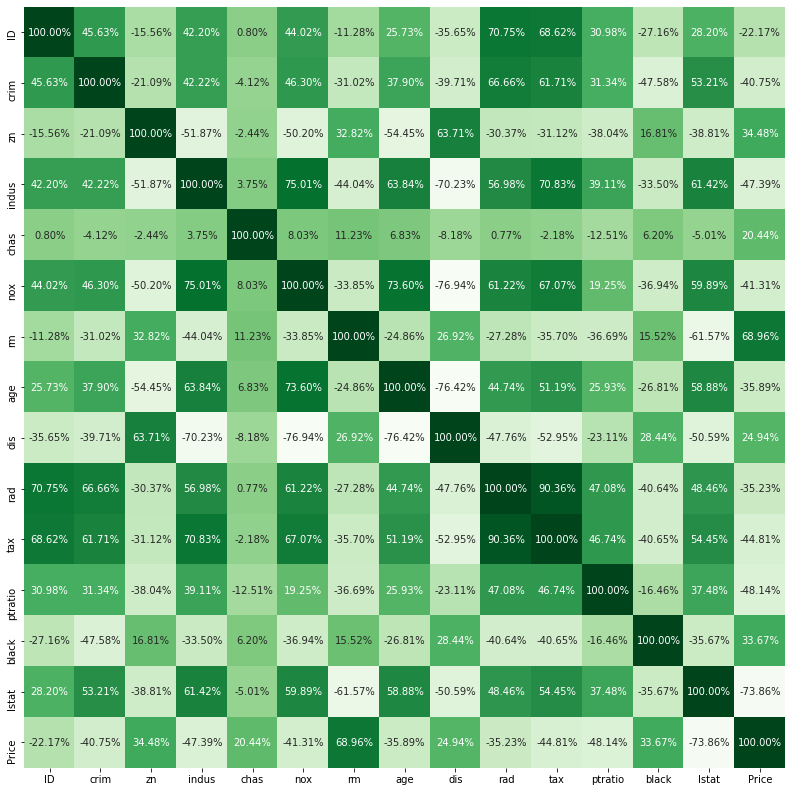

In [10]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar=False, square= True, fmt='.2%', annot=True, cmap='Greens')

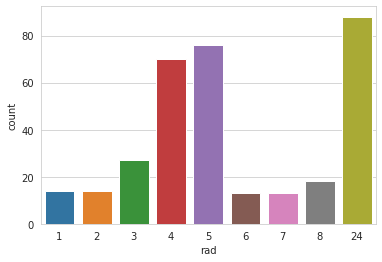

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='rad',data=df)

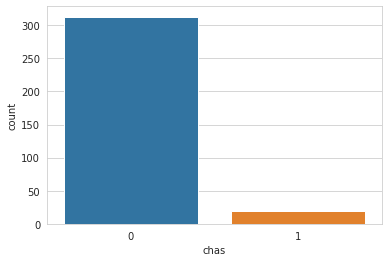

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='chas',data=df)

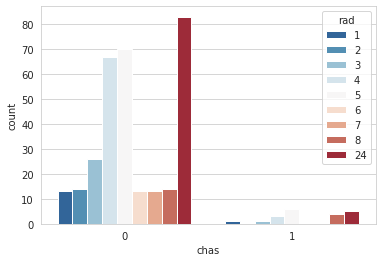

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='chas',hue='rad',data=df,palette='RdBu_r')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


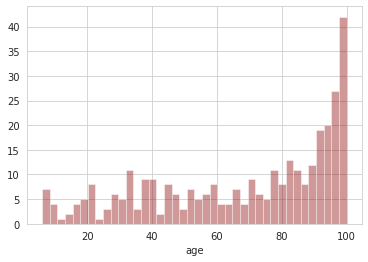

In [14]:
sns.distplot(df['age'].dropna(),kde=False,color='darkred',bins=40)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


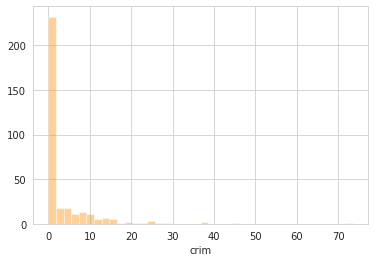

In [15]:
sns.distplot(df['crim'].dropna(),kde=False,color='darkorange',bins=40)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


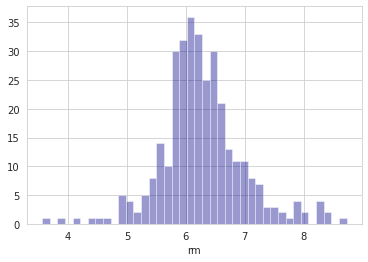

In [16]:
sns.distplot(df['rm'].dropna(),kde=False,color='darkblue',bins=40)

## Feature Selection

In [17]:
# Lets try to understand which are important feature for this dataset
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [18]:
X = df.iloc[:,0:13]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range

In [19]:
X.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60


In [20]:
y = np.round(df['Price'])

In [21]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)

In [22]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [23]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [24]:
featureScores

,Specs,Score
0,ID,5213.133252
1,crim,3251.396750
2,zn,4193.279045
3,indus,618.607714
4,chas,49.220803
5,nox,3.292260
6,rm,14.620403
7,age,1659.128989
8,dis,106.642659
9,rad,879.520751


In [25]:
print(featureScores.nlargest(5,'Score'))  #print 5 best features

    Specs        Score
10    tax  9441.032032
0      ID  5213.133252
2      zn  4193.279045
1    crim  3251.396750
12  black  2440.426651


### Feature Importance

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [27]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.11819978 0.12116859 0.02380958 0.03991412 0.01319199 0.07113041
 0.14281253 0.12810798 0.11492577 0.0331491  0.04117404 0.0421575
 0.11025862]


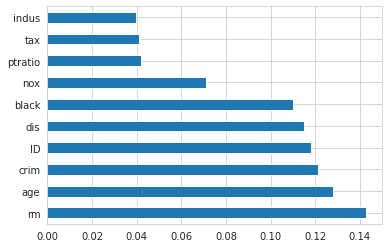

In [28]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Model Fitting 

### Linear Regression

In [29]:
# Values Assigning
X = df.iloc[:,0:13]
y = df.iloc[:,-1]

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
y_pred = model.predict(X_train)

In [33]:
print("Training Accuracy:",model.score(X_train,y_train)*100)

Training Accuracy: 64.50830012345283


In [34]:
print("Testing Accuracy:",model.score(X_test,y_test)*100)

Testing Accuracy: 69.59364446913949


In [35]:
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
print("Model Accuracy:",r2_score(y,model.predict(X))*100)

Model Accuracy: 65.61161377229347


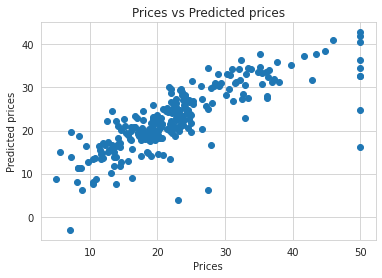

In [37]:
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

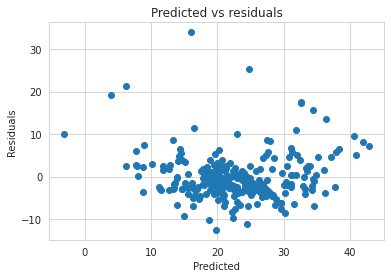

In [38]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


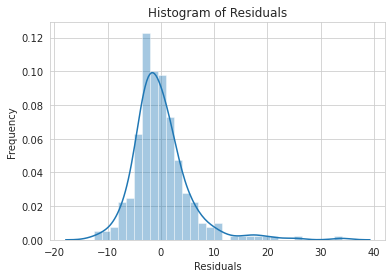

In [39]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

## Random Forest Regressor

In [40]:
X = df.iloc[:,[-1,5,10,4,9]]
y = df.iloc[:,[-1]]

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [42]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [43]:
y_pred = reg.predict(X_train)

In [44]:
print("Training Accuracy:",reg.score(X_train,y_train)*100)

Training Accuracy: 99.98870989435537


In [45]:
print("Testing Accuracy:",reg.score(X_test,y_test)*100)

Testing Accuracy: 99.88221531881003


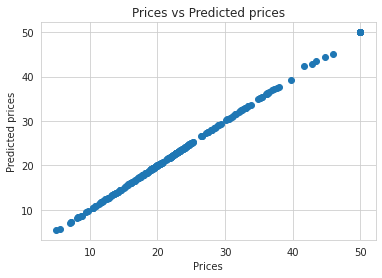

In [46]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

### Finally We Made it!!!

#### Linear Regression

**Model Score:** 73.1% Accuracy <br/>
**Tarining Accuracy:** 72.9% Accuracy <br/>
**Testing Accuracy:** 73.1% Accuracy

#### Random Forest Regressor 
**Tarining Accuracy:** 99.9% Accuracy <br/>
**Testing Accuracy:** 99.8% Accuracy



##Knn

In [47]:
from numba import jit
import numpy
import matplotlib.pyplot as pyplot
import seaborn
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [48]:
%matplotlib inline
seaborn.set_style("whitegrid")

In [49]:
def get_r_squared(max_neighbors=10, samples=100):
    train_score = []
    test_score = []
    models = []
    inputs, values = make_regression(n_samples=samples)
    X_train, X_test, y_train, y_test = train_test_split(inputs, values)

    for neighbors in range(1, max_neighbors+1):
        model = KNeighborsRegressor(n_neighbors=neighbors, n_jobs=4)
        model.fit(X_train, y_train)
        train_score.append(model.score(X_train, y_train))
        test_score.append(model.score(X_test, y_test))
        models.append(model)
    return train_score, test_score, models

([1.0,
  0.6140084359093801,
  0.46878839673908007,
  0.3986812637816847,
  0.3859053674037526,
  0.3040050023924863,
  0.27184045916765065,
  0.2808952272440882,
  0.2590862510257276,
  0.21732718748460422,
  0.1738494405440144,
  0.16794949018023486,
  0.1442645783242028,
  0.13249969296590947,
  0.14898112400895003,
  0.15440044667905228,
  0.13659385470285312,
  0.14184318246186833,
  0.13974401364934386,
  0.13579845063574758],
 [0.16513199670277434,
  0.3180851592244609,
  0.20674334570718733,
  0.12502315243178042,
  0.12774071405955134,
  0.14253099560424742,
  0.13645249769795142,
  0.08213423581900148,
  0.08794456018206709,
  0.1003630682656721,
  0.08753831812637458,
  0.05867266772261581,
  0.08699486700127923,
  0.08904918600073229,
  0.07621795005000254,
  0.08639175091086171,
  0.11126131287807084,
  0.12477721417740262,
  0.11378577110641042,
  0.09935745093012881],
 [KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_p

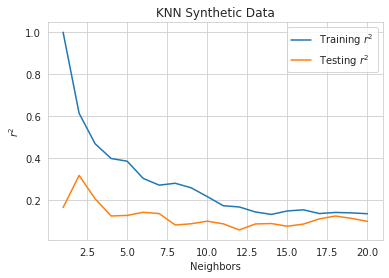

In [50]:
def plot_r_squared(neighbors=20, samples=100):
    train_score, test_score, models = get_r_squared(neighbors, samples)
    neighbors = range(1, neighbors+1)
    pyplot.plot(neighbors, train_score, label="Training $r^2$")
    pyplot.plot(neighbors, test_score, label="Testing $r^2$")
    pyplot.xlabel("Neighbors")
    pyplot.ylabel("$r^2$")
    pyplot.title("KNN Synthetic Data")
    pyplot.legend()
    return train_score, test_score, models
plot_r_squared()

([1.0,
  0.6623865858943234,
  0.5574637139820752,
  0.5159038020152331,
  0.4858011873641232,
  0.46656420159716,
  0.4408109932590039,
  0.426785366664961,
  0.4135723931156854,
  0.39942999078291536,
  0.4004640715810671,
  0.39286613546961524,
  0.3925910037491675,
  0.3860980680967889,
  0.3840728820410672,
  0.38143490562495097,
  0.3778462998238944,
  0.37000692443655075,
  0.3723173041287908,
  0.37031923304377523],
 [-0.254587692419312,
  0.05620791573292028,
  0.16021724819323102,
  0.2012031917121101,
  0.26944913432918904,
  0.2514240769720065,
  0.2656176196980987,
  0.2810590800359207,
  0.2964039639234527,
  0.29023579227734697,
  0.2986869365209788,
  0.3075491815955703,
  0.3058456798467988,
  0.29824979964981013,
  0.3112496092181374,
  0.30721947132905014,
  0.3149565943863307,
  0.3238588939473912,
  0.32335858808164497,
  0.31636364855295784],
 [KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=

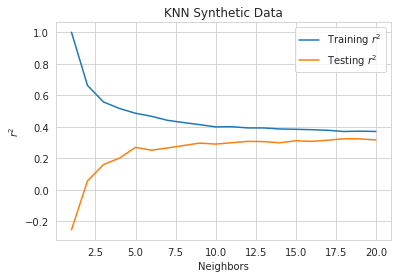

In [51]:
plot_r_squared(samples=1000)

([1.0,
  0.6601471475298211,
  0.5693091681617264,
  0.5245104283795177,
  0.48361489944024,
  0.461944231977934,
  0.43954670900292814,
  0.42357783326803466,
  0.41928701863805706,
  0.42509156048007335,
  0.41823447937118186,
  0.409149611683724,
  0.4032802350357272,
  0.4017217913183839,
  0.3944184169941246,
  0.3890051306507154,
  0.3803627194248792,
  0.37428777439090355,
  0.36801907853260796,
  0.3635597942427994,
  0.359966887329894,
  0.35936955470210974,
  0.3566669184769703,
  0.35527894966753637,
  0.3514482456911756,
  0.3470060620440957,
  0.34457178653835885,
  0.34256186280220835,
  0.33904624319582566,
  0.3368628253340257,
  0.33731574505275663,
  0.3330616523686273,
  0.33225151973478584,
  0.3288192329413683,
  0.3286065275371314,
  0.3273115747001202,
  0.32560103841526233,
  0.32478198072691533,
  0.32045230104274935,
  0.31792478404616076,
  0.3155089239678619,
  0.313814966497307,
  0.31201765445677065,
  0.30950141436968903,
  0.3095014887745189,
  0.3085991

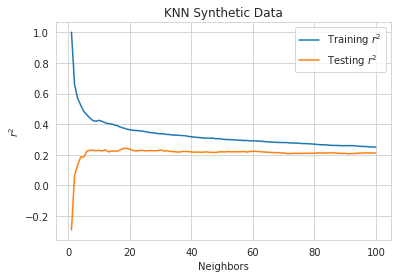

In [52]:
plot_r_squared(neighbors=100, samples=1000)

In [53]:
@jit
def find_first(array, match):
    """find the index of the first match

    Expects a 1-dimensional array or list

    Args:
     array (numpy.array): thing to search
     match: thing to match

    Returns:
     int: index of the first match found (or None)
    """
    for index in range(len(array)):
        if array[index] == match:
            return index
    return

In [54]:
import matplotlib.pyplot as plt  
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error
boston=datasets.load_boston()
x=boston.data[:,:]
y=boston.target
print(x.shape,y.shape)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)

%matplotlib inline
seaborn.set_style("whitegrid")

(506, 13) (506,)


In [55]:
boston = load_boston()
print("Boston data-shape: {0}".format(boston.data.shape))

Boston data-shape: (506, 13)



*   CRIM per capita crime rate by town
* ZN proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS proportion of non-retail business acres per town
* CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX nitric oxides concentration (parts per 10 million)
* RM average number of rooms per dwelling
* AGE proportion of owner-occupied units built prior to 1940
* DIS weighted distances to five Boston employment centres
* RAD index of accessibility to radial highways
* TAX full-value property-tax rate per $10,000
* PTRATIO pupil-teacher ratio by town
* B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT % lower status of the population
* MEDV Median value of owner-occupied homes in $1000's


In [56]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


## **Model Performance**

In [57]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target)

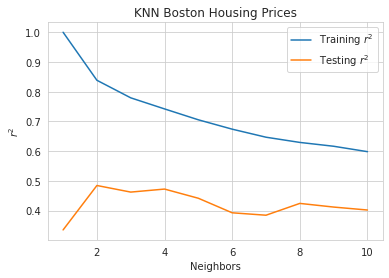

In [58]:
def get_r_squared(max_neighbors=10):
    train_score = []
    test_score = []
    models = []
    for neighbors in range(1, max_neighbors+1):
        model = KNeighborsRegressor(n_neighbors=neighbors)
        model.fit(X_train, y_train)
        train_score.append(model.score(X_train, y_train))
        test_score.append(model.score(X_test, y_test))
        models.append(model)
    return train_score, test_score, models
train_score, test_score, models = get_r_squared()
neighbors = range(1, 11)
pyplot.plot(neighbors, train_score, label="Training $r^2$")
pyplot.plot(neighbors, test_score, label="Testing $r^2$")
pyplot.xlabel("Neighbors")
pyplot.ylabel("$r^2$")
pyplot.title("KNN Boston Housing Prices")
pyplot.legend()

In [59]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
print("Intercept: ", regressor.intercept_)

Intercept:  39.63244448147978


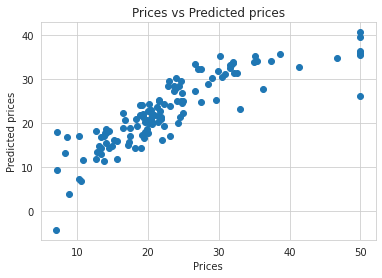

In [61]:
pred_linreg = regressor.predict(X_test)
plt.scatter(y_test,pred_linreg)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

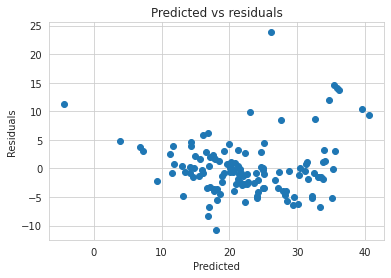

In [62]:
plt.scatter(pred_linreg,y_test-pred_linreg)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of the predicted values')

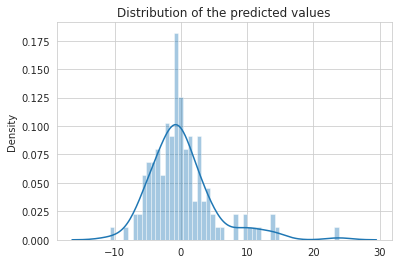

In [63]:
sns.distplot((y_test-pred_linreg),bins=50)
plt.title("Distribution of the predicted values")

In [64]:
from sklearn import metrics
import numpy as np 

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_linreg))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_linreg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_linreg)))
print('R^2:',metrics.r2_score(y_test, pred_linreg))

Mean Absolute Error: 3.4311750600744064
Mean Squared Error: 24.634234817775813
Root Mean Squared Error: 4.963288709895467
R^2: 0.7306188658118344


In [65]:
x = regressor.score(X_test, y_test)
print(x)

0.7306188658118344


In [66]:
regressorscore= x*100
print("Regressor Score: ",regressorscore)

Regressor Score:  73.06188658118344


In [67]:
import random
n = random.randint(0,101)
print("Sample number: ", n)

Sample number:  13


In [68]:
def dis(v,w):
    return np.sqrt(np.sum((v-w)**2))
def knn_r(tr, tr_lab, te , k):
    distances = []
    
    for i in range(tr.shape[0]):
        distances.append(dis(tr[i], te))
    
    distances = np.array(distances)
    inds = np.argsort(distances)
    
    distances = distances[inds]
    tr_lab_2 = tr_lab[inds]
    value = np.average(tr_lab_2[:k])
    
    return value

In [69]:
def knn_reg(tr , tr_lab, te , te_lab , k):
    preds = []
    for i in range(te.shape[0]):
        value = knn_r(tr, tr_lab, te[i] , k)
        preds.append(value)
    
    preds  = np.array(preds)
    err = mean_squared_error(te_lab , preds)
    return err
acc = knn_reg(xtrain , ytrain , xtest , ytest ,5)
print ("MEAN SQUARED ERROR:",acc)

MEAN SQUARED ERROR: 25.860125490196076


In [70]:
print("Training r2 for 2 neigbors: {:.2f}".format(train_score[1]))
print("Testing r2 for 2 neighbors: {:.2f}".format(test_score[1]))
# assert max(test_score) == test_score[1]

Training r2 for 2 neigbors: 0.84
Testing r2 for 2 neighbors: 0.48
